In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import seaborn as sns

# 그래프 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

# 기본 설정 

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

In [2]:
import os

os.getcwd()

'e:\\py_data\\project_3_git\\code'

In [3]:
import json

with open("../data/image_data/train/label/train/train_anger.json", encoding="cp949") as f:
    data1 = json.load(f)

with open("../data/image_data/train/label/train/train_happy.json", encoding="cp949") as f:
    data2 = json.load(f)

with open("../data/image_data/train/label/train/train_panic.json", encoding="cp949") as f:
    data3 = json.load(f)

with open("../data/image_data/train/label/train/train_sadness.json", encoding="cp949") as f:
    data4 = json.load(f)

In [4]:
import os

def count_files_in_directory(directory_path):
    try:
        # 디렉토리 안의 파일과 폴더 목록을 가져옵니다.
        entries = os.listdir(directory_path)
        # 파일만 카운트합니다.
        file_count = sum(1 for entry in entries if os.path.isfile(os.path.join(directory_path, entry)))
        return file_count
    except FileNotFoundError:
        print("지정한 경로가 존재하지 않습니다.")
        return None


In [5]:

train_directory_path = '../data/image_data/train/img/train/'
print(f"화남 파일 개수: {count_files_in_directory(train_directory_path + 'anger'):4d} ,json 딕셔너리 갯수 {len(data1):4d}")
print(f"행복 파일 개수: {count_files_in_directory(train_directory_path + 'happy'):4d} ,json 딕셔너리 갯수 {len(data2):4d}")
print(f"패닉 파일 개수: {count_files_in_directory(train_directory_path + 'panic'):4d} ,json 딕셔너리 갯수 {len(data3):4d}")
print(f"슬픔 파일 개수: {count_files_in_directory(train_directory_path + 'sadness'):4d} ,json 딕셔너리 갯수 {len(data4):4d}")

화남 파일 개수: 1500 ,json 딕셔너리 갯수 1500
행복 파일 개수: 1495 ,json 딕셔너리 갯수 1494
패닉 파일 개수: 1501 ,json 딕셔너리 갯수 1500
슬픔 파일 개수: 1500 ,json 딕셔너리 갯수 1500


In [6]:
import os

def find_images(root_dir):
    # 이미지 확장자 목록
    image_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp'}
    
    image_files = []
    
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if os.path.splitext(file)[1].lower() in image_extensions:
                image_files.append(os.path.join(root, file))
    
    return image_files


In [7]:
train_datas_paths = find_images(train_directory_path)
file_name = train_datas_paths[0].split('\\')[1]

In [8]:
all_jasons = data1 + data2 + data3 + data4

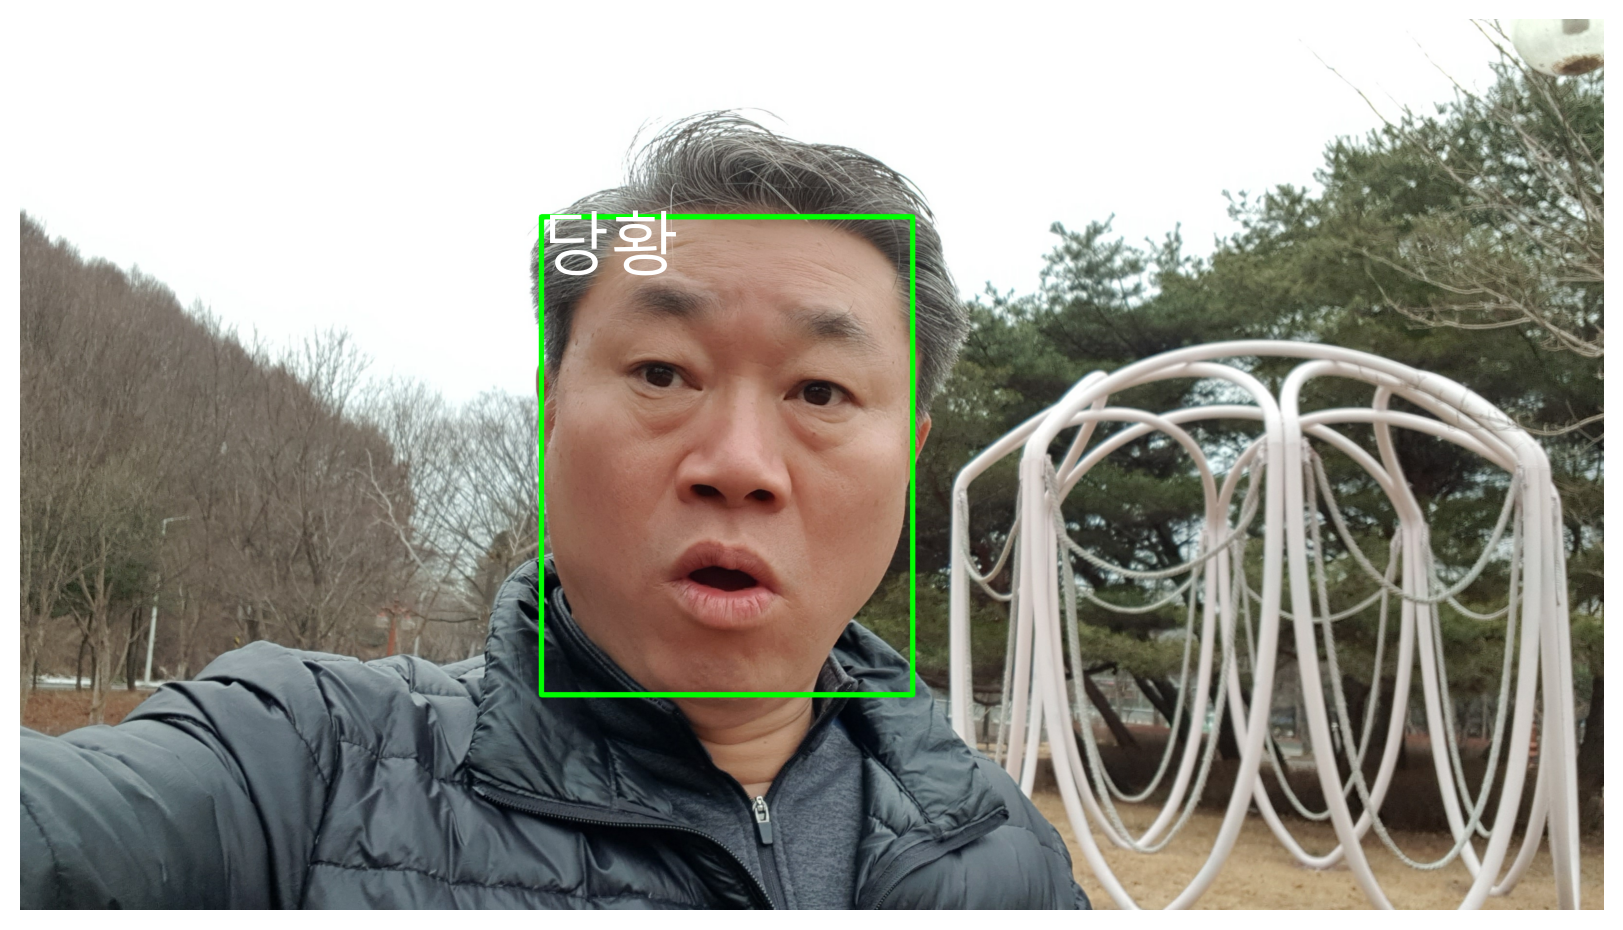

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

i = random.randint(1, len(train_datas_paths)-2) 

name = all_jasons[i]['filename']
expr = all_jasons[i]['annot_A']['faceExp']
boxe = all_jasons[i]['annot_A']['boxes']
back = all_jasons[i]['annot_A']['bg']

min_x, min_y, max_x, max_y = [int(value) for value in boxe.values()] 
name, expr, min_x, min_y, max_x, max_y, back

for i in train_datas_paths:
    if name in i:
        img_path = i

image = cv2.imread(img_path)

cv2.rectangle(image, (min_x, min_y), (max_x, max_y), (0, 255, 0), 10)
plt.axis('off')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.text(max_x, max_y, expr, color='white', fontsize=25,
         ha='left', va='top')


plt.show()